In [1]:
cd /g/data/jk72/deg581/seqom/analysis/notebooks/

/g/data/jk72/deg581/seqom/analysis/notebooks


In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [3]:
print(client)


<Client: 'tcp://127.0.0.1:38541' processes=7 threads=28, memory=125.20 GiB>


In [4]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/98240431.gadi-pbs'

In [5]:
# load single ROMS netcdf with xr
ds = xr.open_dataset('../../seqld_visc110/roms_his_0005_5daymn.nc')
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, Nuser: 1, eta_rho: 600, xi_rho: 800,
                      eta_u: 600, xi_u: 799, eta_v: 599, xi_v: 800,
                      eta_psi: 599, xi_psi: 799)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2011-01-03 ... 2011-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, Nuser, eta_rho, xi_rho,
                                eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/43)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr            (ocean_time, eta_u, xi_u) float32 ...
    svstr            (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/36)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0005.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             South-east Queensland, 1/100 (900m) degree resolution
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            024x020
    history:           Mon Oct 16 18:00:29 2023: cdo timselmean,5 roms_his_00...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, BOUNDARY...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [6]:
ds.nbytes/1e9

35.902419176

In [7]:
ds = ds.drop_vars({'u','v','w','sustr','svstr','shflux','ssflux','rho','ubar_eastward','vbar_northward'})
ds.nbytes/1e9

17.554540776

In [8]:
ds['Vtransform']=2
ds['hc']=20

In [9]:
ds.load()

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, Nuser: 1, eta_rho: 600, xi_rho: 800,
                      eta_u: 600, xi_u: 799, eta_v: 599, xi_v: 800,
                      eta_psi: 599, xi_psi: 799)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2011-01-03 ... 2011-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, Nuser, eta_rho, xi_rho,
                                eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/35)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] 2011-01-01 ... 2011-12-31
    nl_tnu2          (tracer) float64 0.4 0.4
    LtracerSponge    (tracer) int32 0 0
    Akt_bak          (tracer) float64 1e-05 1e-05
    Tnudg            (tracer) float64 0.002778 0.002778
    FSobc_in         (boundary) float64 0.0 0.0 0.0 0.0
    ...               ...
    u_eastward       (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 0.0
    v_northward      (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 0.0
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 31.22
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 35.46
    Vtransform       int64 2
    hc               int64 20
Attributes: (12/36)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0005.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             South-east Queensland, 1/100 (900m) degree resolution
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            024x020
    history:           Mon Oct 16 18:00:29 2023: cdo timselmean,5 roms_his_00...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, BOUNDARY...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [10]:
# do special processing for ROMS formatting


def processROMSGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        Zo_w = ds.hc * (ds.s_w - ds.Cs_w) + ds.Cs_w * ds.h
        z_w = Zo_w + ds.zeta * (1 + Zo_w/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta
    print('making vertical coordinates')
    
    ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    # Other Option is to transpose arrays and fill NaNs with a minimal depth
    # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
    # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
    ds["z_rho0"] = ds.z_rho0.fillna(0)

     # interpolate depth of levels at U and V points
    ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
    ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')
    print('made V transform coordinates')

    print('making x/y metrics')
    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi
    print('making z metrics')

    ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
    ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
    ds['dz_u'] = grid.interp(ds.dz, 'X')
    ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
    ds['dz_v'] = grid.interp(ds.dz, 'Y')
    ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])
    print('finished')
    return ds,grid


ds,grid = processROMSGrid(ds)



making vertical coordinates
made V transform coordinates
making x/y metrics
making z metrics
finished


In [11]:
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, Nuser: 1, eta_rho: 600, xi_rho: 800,
                      xi_u: 799, eta_v: 599)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2011-01-03 ... 2011-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    z_w              (ocean_time, s_w, eta_rho, xi_rho) float64 0.0 ... 0.08088
    z_rho            (ocean_time, s_rho, eta_rho, xi_rho) float64 0.0 ... -0....
    z_rho0           (eta_rho, xi_rho, s_rho) float64 0.0 0.0 ... -1.253 -0.3058
Dimensions without coordinates: bnds, tracer, boundary, Nuser, eta_rho, xi_rho,
                                xi_u, eta_v
Data variables: (12/58)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] 2011-01-01 ... 2011-12-31
    nl_tnu2          (tracer) float64 0.4 0.4
    LtracerSponge    (tracer) int32 0 0
    Akt_bak          (tracer) float64 1e-05 1e-05
    Tnudg            (tracer) float64 0.002778 0.002778
    FSobc_in         (boundary) float64 0.0 0.0 0.0 0.0
    ...               ...
    dz_w             (ocean_time, s_w, eta_rho, xi_rho) float64 0.0 ... 0.2278
    dz_u             (ocean_time, s_rho, eta_rho, xi_u) float64 0.0 ... 0.7327
    dz_w_u           (ocean_time, s_w, eta_rho, xi_u) float64 0.0 0.0 ... 0.2293
    dz_v             (ocean_time, s_rho, eta_v, xi_rho) float64 0.0 ... 0.7476
    dz_w_v           (ocean_time, s_w, eta_v, xi_rho) float64 0.0 0.0 ... 0.234
    dA               (eta_rho, xi_rho) float64 1.236e+06 1.236e+06 ... 1.236e+06
Attributes: (12/36)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0005.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             South-east Queensland, 1/100 (900m) degree resolution
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            024x020
    history:           Mon Oct 16 18:00:29 2023: cdo timselmean,5 roms_his_00...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, BOUNDARY...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [12]:
# calculate mean of DJF, mean of JJA

# calculate the month length for each value
month_length = ds.ocean_time.dt.days_in_month


## Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("ocean_time.season") / month_length.groupby("ocean_time.season").sum()
)

## Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("ocean_time.season").sum().values, np.ones(4))

## Calculate the weighted average
ds_temp_weighted = (ds.temp * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_salt_weighted = (ds.salt * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_u_weighted = (ds.u_eastward * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_v_weighted = (ds.v_northward * weights).groupby("ocean_time.season").sum(dim="ocean_time")


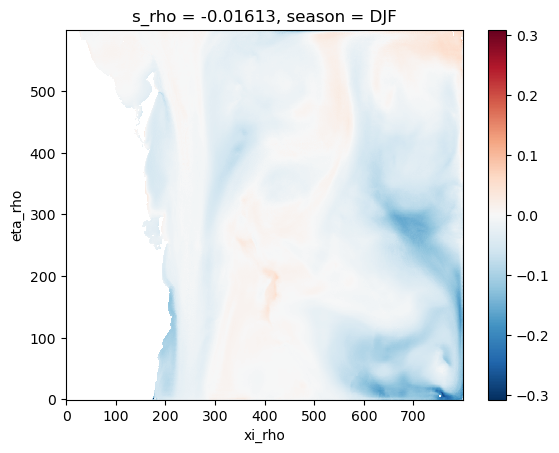

In [13]:
# check what difference is
(ds_temp_weighted - ds.temp.groupby("ocean_time.season").mean("ocean_time")).sel(season='DJF').isel(s_rho=-1).plot()


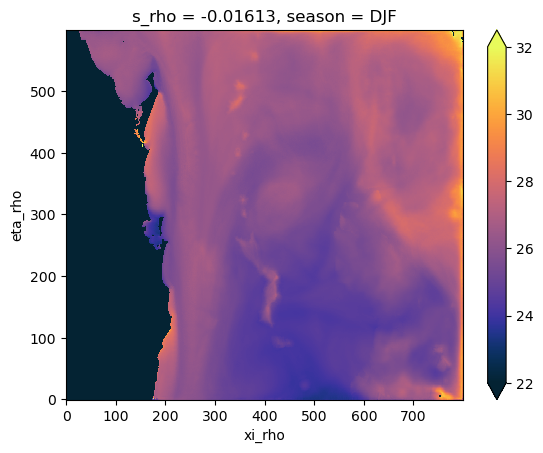

In [14]:
# mean summer surface temperature
ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=22,vmax=32)

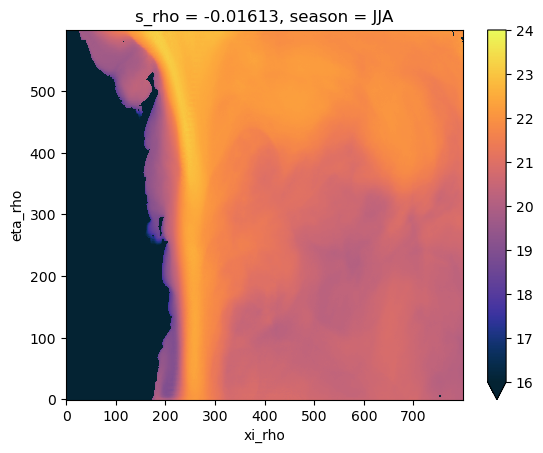

In [15]:
# mean winter surface temperature
ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=24)

<Figure size 640x480 with 0 Axes>

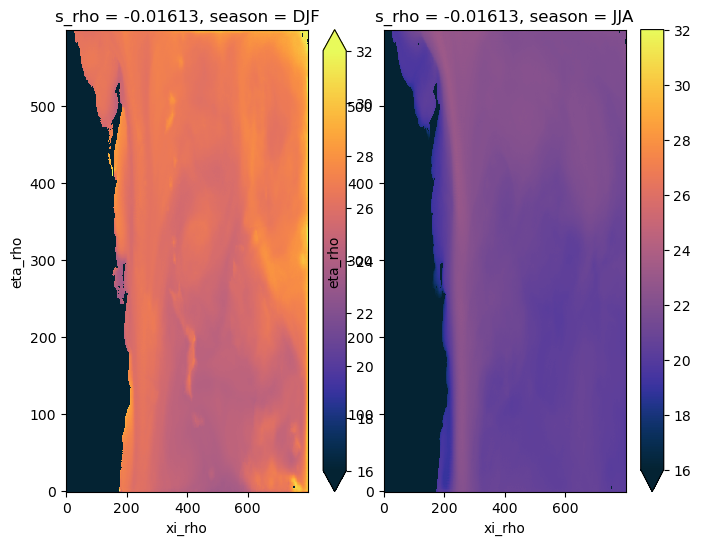

In [16]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
im = ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

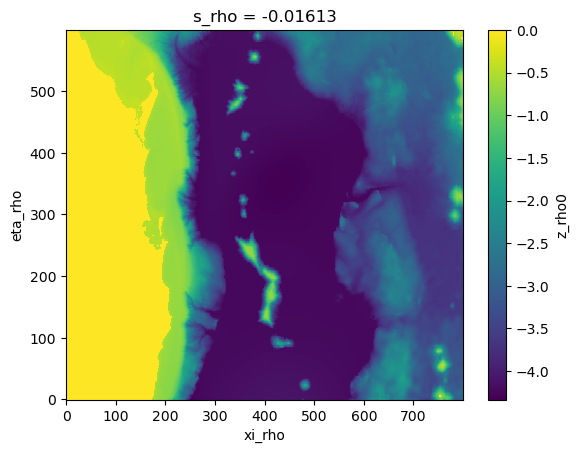

In [17]:
# what is the depth of the top cells?
ds.z_rho0.isel(s_rho=-1).plot()

In [18]:
def horizontalSectionROMS(grid,inputVal,targetDepth):
    # v2
    output = grid.transform(inputVal, 'Z', targetDepth,
                                    target_data=inputVal['z_rho0'],
                                    method='linear').squeeze()
    return output



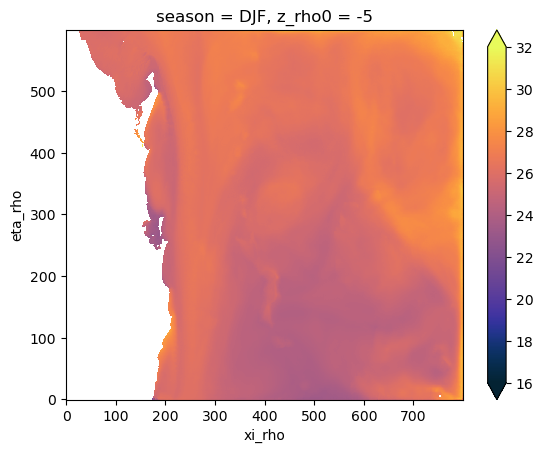

In [24]:

# gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
# plt.cla()
# plt.clf()
# fig = plt.figure(figsize=[8,6])
# ax = None


# ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# # ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# # cax = inset_axes(ax,
# #              width="5%",  # width = 10% of parent_bbox width
# #              height="50%",  # height : 50%
# #              loc='lower left',
# #              bbox_to_anchor=(.07,.39, 1, 1),
# #              bbox_transform=ax.transAxes,
# #              borderpad=0,
# #              )
# # fig.colorbar(im, cax=cax)

# ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
# im = ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# # cax = inset_axes(ax,
# #              width="5%",  # width = 10% of parent_bbox width
# #              height="50%",  # height : 50%
# #              loc='lower left',
# #              bbox_to_anchor=(.07,.39, 1, 1),
# #              bbox_transform=ax.transAxes,
# #              borderpad=0,
# #              )
# # fig.colorbar(im, cax=cax)

horizontalSectionROMS(grid, ds_temp_weighted, np.array([-5])).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)

<Figure size 640x480 with 0 Axes>

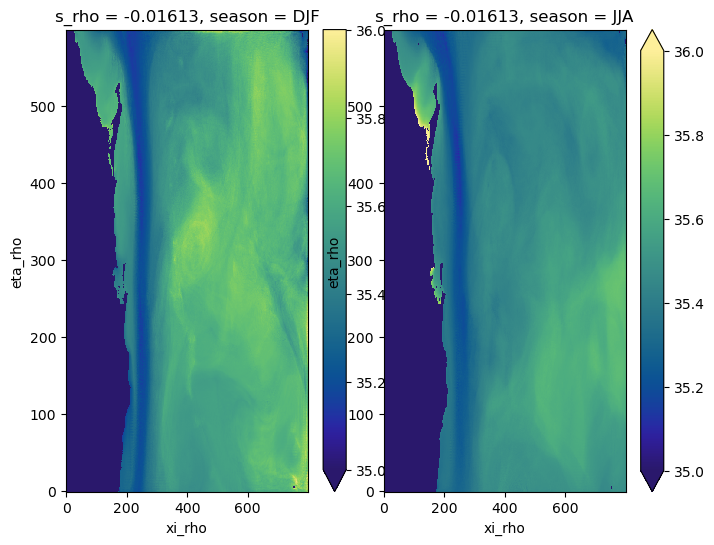

In [27]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
im = ds_salt_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.haline',vmin=35,vmax=36)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

In [ ]:
ds_grid = xr.open_dataset('../../seqld_zeroforcing_realIni/roms_his_0001.nc')
ds['lat_rho'] = ds_grid.lon_rho
ds['lat_rho'] = ds_grid.lat_rho


<Figure size 640x480 with 0 Axes>

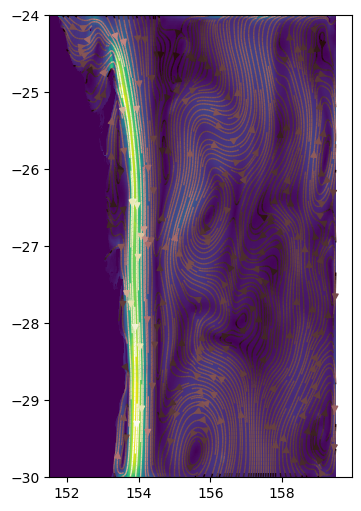

In [47]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)



inp = np.sqrt(ds_u_weighted.isel(s_rho=-1).squeeze()**2+ds_v_weighted.isel(s_rho=-1).squeeze()**2)
im = ax.pcolormesh(ds.lon_rho,ds.lat_rho,inp.sel(season='DJF'))

str_kwargs = {"color":inp.sel(season='DJF').values,
              "linewidth":1,
              "arrowsize":1,
              "density":4,
              "cmap":"pink"}
st = ax.streamplot(ds.lon_rho.values, ds.lat_rho.values, ds_u_weighted.sel(season='DJF').isel(s_rho=-1).values, ds_v_weighted.sel(season='DJF').isel(s_rho=-1).values,**str_kwargs)


<Figure size 640x480 with 0 Axes>

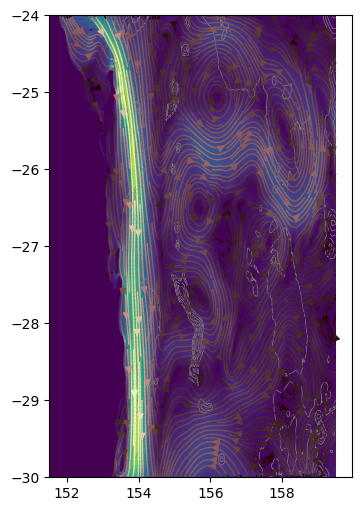

In [54]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)



inp = np.sqrt(ds_u_weighted.isel(s_rho=-1).squeeze()**2+ds_v_weighted.isel(s_rho=-1).squeeze()**2)
im = ax.pcolormesh(ds.lon_rho,ds.lat_rho,inp.sel(season='JJA'))
ax.contour(ds.lon_rho,ds.lat_rho,ds.h,levels=np.array((100,500,1000,2000,3000,4000)),colors='grey',linewidths=0.5)
str_kwargs = {"color":inp.sel(season='JJA').values,
              "linewidth":1,
              "arrowsize":1,
              "density":4,
              "cmap":"pink"}
st = ax.streamplot(ds.lon_rho.values, ds.lat_rho.values, ds_u_weighted.sel(season='JJA').isel(s_rho=-1).values, ds_v_weighted.sel(season='JJA').isel(s_rho=-1).values,**str_kwargs)
